# House Price Predictions with Linear Regression

In [1]:
%run Coding_linear_regression.ipynb 
# allows us to use the functions we wrote

import pandas

### Exploring the relationship between price and area

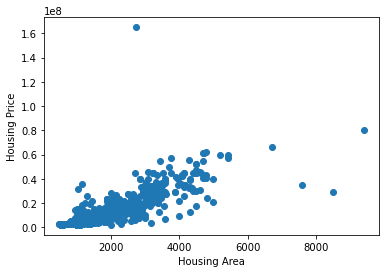

In [2]:
data = pandas.read_csv('Hyderabad.csv')
plot_scatter(
    data['Area'], data['Price'], "Housing Area", "Housing Price")
plt.show()

## With turicreate

### Testing a model with only one feature

In [ ]:
import turicreate as tc
data_tc = tc.SFrame('Hyderabad.csv')
data

In [ ]:
simple_model = tc.linear_regression.create(data_tc, features=['Area'], target='Price')
simple_model.coefficients
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

plot_scatter(data_tc['Area'], data_tc['Price'])
draw_line(m, b, starting=0, ending=max(data_tc['Area']))
plt.show()

### Building a model that uses all the features

In [ ]:
model = tc.linear_regression.create(data, target='Price')

In [ ]:
model.coefficients

In [ ]:
model.evaluate(data)

In [ ]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
model.predict(house)

# With statsmodels

### Testing a model with only one feature

statsmodels doesn't automatically add an intercept (constant bias) column, so we have to add that ourselves.

In [3]:
import statsmodels.api as sm

exog = sm.add_constant(data['Area']) # adds an intercept column
model_linear_regression = sm.OLS(
    endog = data['Price'],
    exog = exog)
results_regression = model_linear_regression.fit()

In [4]:
results_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     5542.
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:19:18   Log-Likelihood:                -42364.
No. Observations:                2518   AIC:                         8.473e+04
Df Residuals:                    2516   BIC:                         8.474e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.223e+06   2.37e+05    -26.298      0.000   -6.69e+06   -5.76e+06
Area        9753.9406    131.026     74.443      0.000    9497.012       1e+04
==============================================================================
Omnibus:                     4164.869   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9856160.923
Skew:                          10.294   Prob(JB):                         0.00
Kurtosis:                     308.809   Cond. No.                     4.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
results_regression.params

const   -6.222669e+06
Area     9.753941e+03
dtype: float64

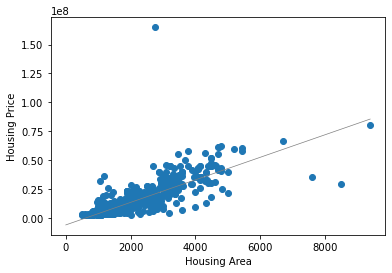

In [6]:
plot_scatter(
    data['Area'], data['Price'], "Housing Area", "Housing Price")
draw_line(*results_regression.params[::-1], starting=0, ending=max(data['Area']))
plt.show()

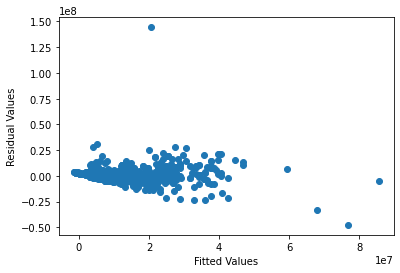

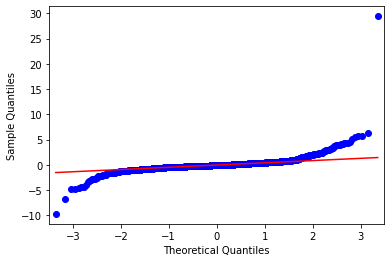

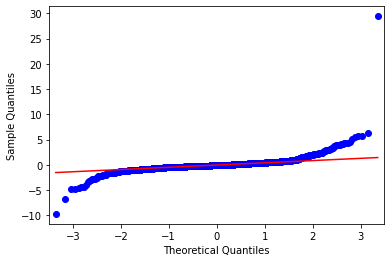

In [7]:
plot_scatter(
    results_regression.fittedvalues,
    results_regression.resid,
    x_label = "Fitted Values",
    y_label = "Residual Values")
plt.show()
# Not sure why it plots twice
sm.qqplot(results_regression.resid_pearson, line = "q")

### Building a model that uses all the features

statsmodels doesn't handle categorical values for us, so we need to adjust our dataset using `pandas.get_dummies()`

In [8]:
exog = data.copy()
exog = sm.add_constant(exog) # adds an intercept column
exog = pandas.get_dummies(exog) # Converts categorical to one-hot
endog = exog.pop("Price")

model_linear_regression = sm.OLS(
    endog = endog,
    exog = exog)
results_regression = model_linear_regression.fit()

In [9]:
results_regression.summary() # yields a very large printout

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     26.67
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:19:50   Log-Likelihood:                -41982.
No. Observations:                2518   AIC:                         8.453e+04
Df Residuals:                    2237   BIC:                         8.616e+04
Df Model:                         280                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                         -2.172e+06   5.23e+05     -4.156      0.000    -3.2e+06   -1.15e+06
Area                                           9017.1039    250.019     36.066      0.000    8526.809    9507.398
No. of Bedrooms                               -1.403e+06   2.52e+05     -5.566      0.000    -1.9e+06   -9.08e+05
Resale                                         1.167e+06   2.93e+05      3.990      0.000    5.93e+05    1.74e+06
MaintenanceStaff                              -9.871e+05   4.11e+05     -2.404      0.016   -1.79e+06   -1.82e+05
Gymnasium                                     -5.717e+05    5.5e+05     -1.039      0.299   -1.65e+06    5.08e+05
SwimmingPool                                   1722.0297   5.43e+05      0.003      0.997   -1.06e+06    1.07e+06
LandscapedGardens                              8.866e+05   4.43e+05      2.003      0.045    1.84e+04    1.75e+06
JoggingTrack                                  -3.095e+05   4.77e+05     -0.649      0.517   -1.25e+06    6.26e+05
RainWaterHarvesting                           -4.642e+05    4.4e+05     -1.056      0.291   -1.33e+06    3.98e+05
IndoorGames                                    2.855e+05   4.76e+05      0.600      0.548   -6.47e+05    1.22e+06
ShoppingMall                                   6.725e+05   7.59e+05      0.886      0.376   -8.16e+05    2.16e+06
Intercom                                      -1.022e+05   3.46e+05     -0.295      0.768   -7.82e+05    5.77e+05
SportsFacility                                -5.126e+04   3.87e+05     -0.132      0.895   -8.11e+05    7.08e+05
ATM                                           -4.497e+05   5.26e+05     -0.855      0.393   -1.48e+06    5.82e+05
ClubHouse                                      4.043e+05   5.12e+05      0.790      0.430   -5.99e+05    1.41e+06
School                                        -2.704e+06   1.28e+06     -2.107      0.035   -5.22e+06   -1.87e+05
24X7Security                                  -1.453e+05   5.02e+05     -0.290      0.772   -1.13e+06    8.39e+05
PowerBackup                                    1.727e+05    3.8e+05      0.454      0.650   -5.73e+05    9.18e+05
CarParking                                    -2.183e+05   4.66e+05     -0.469      0.639   -1.13e+06    6.95e+05
StaffQuarter                                   7.038e+05   4.86e+05      1.448      0.148    -2.5e+05    1.66e+06
Cafeteria                                      1.282e+06   4.76e+05      2.694      0.007    3.49e+05    2.22e+06
MultipurposeRoom                                2.64e+05   4.22e+05      0.625      0.532   -5.64e+05    1.09e+06
Hospital                                       1.685e+06   1.19e+06      1.413      0.158   -6.54e+05    4.02e+06
Washi

In [10]:
results_regression.params

const                        -2.172483e+06
Area                          9.017104e+03
No. of Bedrooms              -1.402722e+06
Resale                        1.167010e+06
MaintenanceStaff             -9.870834e+05
                                  ...     
Location_muthangi            -2.412456e+06
Location_new nallakunta       1.104397e+06
Location_nizampet road       -2.977143e+05
Location_raidurgam            1.358650e+05
Location_west venkatapuram   -1.226744e+06
Length: 282, dtype: float64

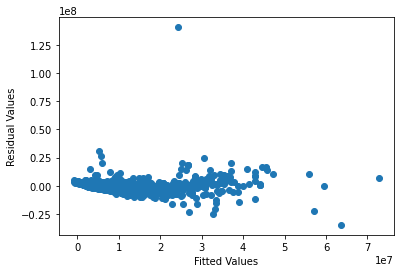

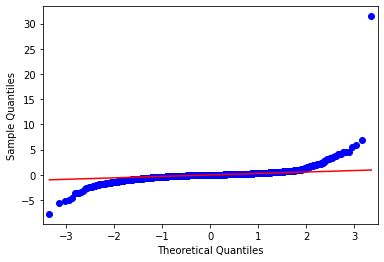

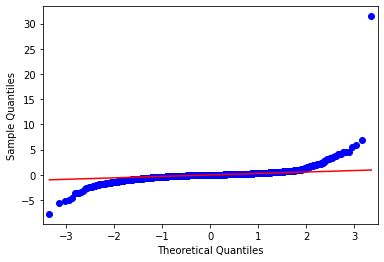

In [11]:
plot_scatter(
    results_regression.fittedvalues,
    results_regression.resid,
    x_label = "Fitted Values",
    y_label = "Residual Values")
plt.show()
# Not sure why it plots twice
sm.qqplot(results_regression.resid_pearson, line = "q")

In [14]:
house = { 'No. of Bedrooms' : 3, 'Area': 1000 }

def predict_linear_regression(fitted_model, dict_features):
    """ 
    Calculates y ~ const + sum( parameter*value )

    { 'feature name' : value }
    
    Does not assume you have all features present, so prediction may be off.
    Assumes const parameter is not present in dictionary
    """
    list_given_terms = [
        fitted_model.params[key]*value for key, value in dict_features.items()
    ]
    constant_value = fitted_model.params['const']
    list_given_terms.append(constant_value)
    
    return sum(list_given_terms)

prediction = predict_linear_regression(results_regression, house)
print("Predicted housing price:", prediction)

Predicted housing price: 2636455.9536827086
